# Alzhmiers Disease detection and Classification using Transfer Learning:

# Importing Required Libaries:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install unrar
!unrar x '/content/drive/MyDrive/Datasets/Alzheimer disease detection/Training.rar'
!unrar x '/content/drive/MyDrive/Datasets/Alzheimer disease detection/Validation.rar'

Streaming output truncated to the last 5000 lines.
Extracting  Training/NonDemented/NonDemented (1484).JPG                   54%  OK 
Extracting  Training/NonDemented/NonDemented (1485).JPG                   54%  OK 
Extracting  Training/NonDemented/NonDemented (1486).JPG                   54%  OK 
Extracting  Training/NonDemented/NonDemented (1487).JPG                   54%  OK 
Extracting  Training/NonDemented/NonDemented (1488).JPG                   54%  OK 
Extracting  Training/NonDemented/NonDemented (1489).JPG                   54%  OK 
Extracting  Training/NonDemented/NonDemented (149).JPG                    54%  OK 
Extracting  Training/NonDemented/NonDemented (1490).JPG                   54%  OK 
Extracting  Training/NonDemented/NonDemented (1491).JPG                   54%  OK 
Extracting  Training/NonDemented/NonDemented (1492).JPG                   54%  OK 
Extracting  Training/NonDemen

In [ ]:
#!pip install imutils==0.5.4

In [3]:
# Importing required Libaries:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import cv2
import imutils

import tensorflow
import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Conv2D,GlobalMaxPooling2D,Dense,Dropout,Activation,Flatten,BatchNormalization
from tensorflow.keras.optimizers import Adam

# Dataset Descriptions:

In [4]:
path=r"/content/Training"
os.listdir(path)
print("No.of classess:",os.listdir(path))

No.of classess: ['VeryMildDemented', 'NonDemented', 'MildDemented', 'ModerateDemented']


In [5]:
#Plotting the sample images in the categories:
# Load images
# After Cropping:
MD = cv2.imread(r"/content/Training/MildDemented/MildDemented (1).JPG")
MoD = cv2.imread(r"/content/Training/ModerateDemented/ModerateDemented (1).JPG")
ND = cv2.imread(r"/content/Training/NonDemented/NonDemented (1).JPG")
VMD = cv2.imread(r"/content/Training/VeryMildDemented/VeryMildDemented (1).JPG")

Text(0.5, 1.0, 'Very Mild demented')

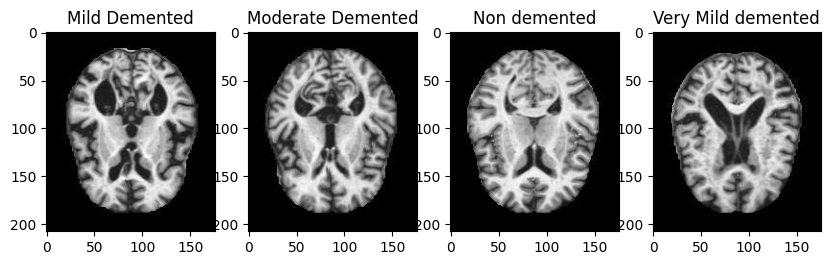

In [6]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))

# Display images in subplots
axes[0].imshow(cv2.cvtColor(MD, cv2.COLOR_BGR2RGB))
axes[0].set_title("Mild Demented")
axes[1].imshow(cv2.cvtColor(MoD, cv2.COLOR_BGR2RGB))
axes[1].set_title("Moderate Demented")
axes[2].imshow(cv2.cvtColor(ND, cv2.COLOR_BGR2RGB))
axes[2].set_title("Non demented")
axes[3].imshow(cv2.cvtColor(VMD, cv2.COLOR_BGR2RGB))
axes[3].set_title("Very Mild demented")

In [7]:
training_dataset=ImageDataGenerator(rescale=1/255,shear_range=0.01,rotation_range=20,horizontal_flip=True,height_shift_range=0.01,width_shift_range=0.01)
testing_dataset=ImageDataGenerator(rescale=1/255)

In [8]:
training_set=training_dataset.flow_from_directory(directory=r"/content/Training",target_size=(224,224),batch_size=8,class_mode="categorical")
testing_set=testing_dataset.flow_from_directory(directory=r"/content/Validation",target_size=(224,224),batch_size=1,class_mode="categorical")

Found 6660 images belonging to 4 classes.
Found 2025 images belonging to 4 classes.


# Model creation

In [9]:
model=InceptionV3(input_shape=[224,224]+[3],weights="imagenet",include_top=False)
model.summary()

87910968/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)           

In [10]:
for layer in model.layers:
  layer.trainable=False

In [11]:
X=Flatten()(model.output)
prediction=Dense(4,activation="softmax")(X)

In [12]:
model=Model(inputs=model.input,outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [13]:
opt=Adam(learning_rate=1e-6)
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

In [15]:
history=model.fit(training_set,validation_data=testing_set,epochs=50,batch_size=8)

Epoch 1/50
833/833 [==============================] - 123s 147ms/step - loss: 1.3533 - accuracy: 0.3983 - val_loss: 1.0997 - val_accuracy: 0.5294
Epoch 2/50
833/833 [==============================] - 119s 143ms/step - loss: 1.0668 - accuracy: 0.5556 - val_loss: 0.9387 - val_accuracy: 0.6237
Epoch 3/50
833/833 [==============================] - 136s 163ms/step - loss: 0.9350 - accuracy: 0.6204 - val_loss: 0.8588 - val_accuracy: 0.6627
Epoch 4/50
833/833 [==============================] - 118s 141ms/step - loss: 0.8548 - accuracy: 0.6661 - val_loss: 0.7861 - val_accuracy: 0.7032
Epoch 5/50
833/833 [==============================] - 118s 141ms/step - loss: 0.8011 - accuracy: 0.6805 - val_loss: 0.7495 - val_accuracy: 0.7205
Epoch 6/50
833/833 [==============================] - 118s 142ms/step - loss: 0.7528 - accuracy: 0.7104 - val_loss: 0.7127 - val_accuracy: 0.7383
Epoch 7/50
833/833 [==============================] - 117s 141ms/step - loss: 0.7156 - accuracy: 0.7261 - val_loss: 0.6691 -

In [16]:
model.save(r"/content/drive/MyDrive/Datasets/Alzheimer disease detection/Alzhimers.h5")

# plotting the graph:


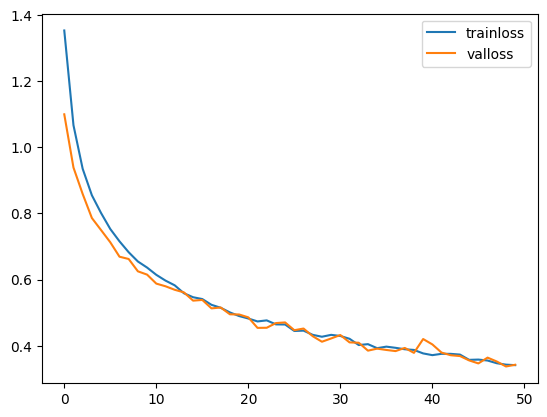

In [17]:
plt.plot(history.history["loss"],label="trainloss")
plt.plot(history.history["val_loss"],label="valloss")
plt.legend()
plt.show()

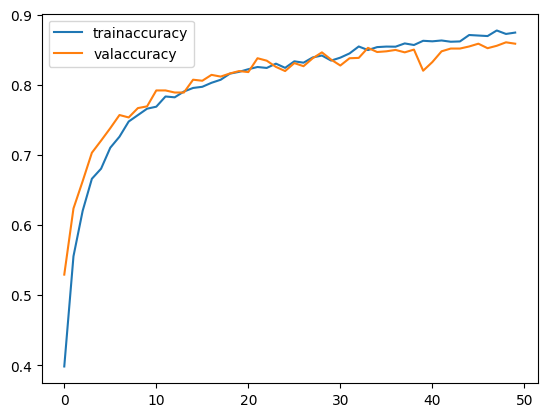

In [18]:
plt.plot(history.history["accuracy"],label='trainaccuracy')
plt.plot(history.history['val_accuracy'],label='valaccuracy')
plt.legend()
plt.show()

In [19]:
accuracy_score=model.evaluate(training_set)
print(accuracy_score)
print("Accuracy:{:.4f}%".format(accuracy_score[1]*100))
print("Loss:{:.4f}%".format(accuracy_score[0]))

833/833 [==============================] - 90s 108ms/step - loss: 0.3461 - accuracy: 0.8719
[0.34614914655685425, 0.8719218969345093]
Accuracy:87.1922%
Loss:0.3461%


In [20]:
accuracy_score=model.evaluate(testing_set)
print(accuracy_score)
print("Accuracy:{:.4f}%".format(accuracy_score[1]*100))
print("Loss:{:.4f}".format(accuracy_score[0]*100))

2025/2025 [==============================] - 27s 13ms/step - loss: 0.3422 - accuracy: 0.8588
[0.3421659767627716, 0.8587654232978821]
Accuracy:85.8765%
Loss:34.2166


In [21]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [22]:
y_pred=model.predict(testing_set)
y_pred=np.argmax(y_pred,axis=1)

2025/2025 [==============================] - 24s 11ms/step


In [23]:
y_pred

array([3, 1, 0, ..., 2, 2, 2])

In [24]:
cm=confusion_matrix(testing_set.classes,y_pred)
cm

array([[162, 106, 164,  94],
       [128,  95, 101,  90],
       [174, 103, 169, 104],
       [159, 134, 155,  87]])

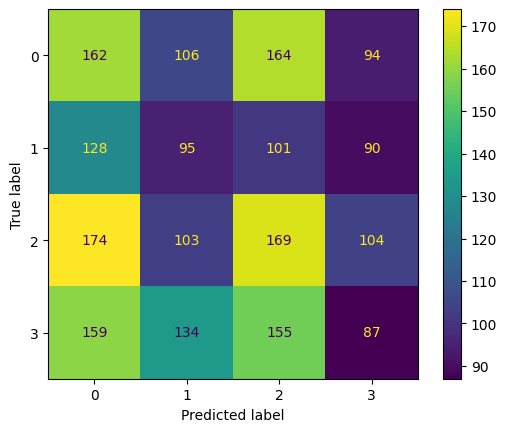

In [25]:
cm_display=ConfusionMatrixDisplay(cm)
cm_display.plot()

# Predictions:

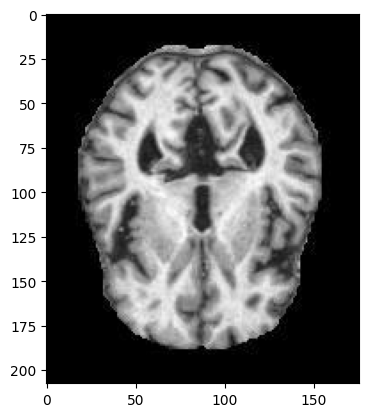

In [26]:
from skimage.io import imread
from skimage import transform

I_test=imread(r"/content/Validation/MildDemented/MildDemented (1).JPG")
plt.imshow(I_test)

In [27]:
I_test=np.array(I_test).astype("float32")/255
I_test=transform.resize(I_test,(224,224,3))
I_test=np.expand_dims(I_test,axis=0)
I_test.shape

(1, 224, 224, 3)

In [28]:
predictions=model.predict(I_test)
predictions=np.argmax(predictions)
print(predictions)

1/1 [==============================] - 2s 2s/step
0
